# Using the Explode methode in pandas

## Importing libraries & Loading DataFrame

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
df = pd.read_csv('C:/Users/DELL/Desktop/SQL/Data_analysis/data_jobs.csv')

## Data Cleanup

In [67]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x) # This transforms the string into a list  


## Creating a copy of the original df and call it df_da
### Filter it by job_title_short == 'Data Analyst'

In [69]:
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

## Aggregating the skills on monthly basis
### 1. Extracting the months from job_posted_date

### 2. Creating job_posted_month_no column

In [70]:
df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month


In [71]:
df_da['job_posted_month_no'].value_counts()

job_posted_month_no
1     23585
8     18628
2     16558
3     16243
10    16239
7     16095
6     16008
4     15514
11    15230
9     14969
12    13583
5     13423
Name: count, dtype: int64

## Exploring job_skills

### Creating a new data frame for that

In [72]:
df_da_explode= df_da.explode('job_skills')
df_da_explode.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1


### Pivoting df_da_explode

In [73]:
df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size')

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197.0,17.0,551.0,63.0,2.0,20.0,2.0,1.0,29.0,34.0,...,17.0,228.0,6.0,1778.0,NaN,11.0,6.0,NaN,9.0,95.0
2,169.0,2.0,448.0,49.0,NaN,14.0,1.0,4.0,27.0,13.0,...,9.0,202.0,6.0,1235.0,4.0,2.0,5.0,NaN,4.0,41.0
3,181.0,4.0,442.0,34.0,NaN,23.0,6.0,1.0,17.0,13.0,...,8.0,194.0,8.0,1203.0,1.0,1.0,3.0,1.0,5.0,45.0
4,155.0,4.0,413.0,22.0,NaN,11.0,8.0,9.0,9.0,15.0,...,9.0,185.0,14.0,1177.0,8.0,2.0,1.0,NaN,6.0,26.0
5,128.0,8.0,310.0,30.0,NaN,19.0,9.0,2.0,8.0,21.0,...,11.0,122.0,3.0,957.0,3.0,4.0,NaN,NaN,7.0,18.0
6,164.0,14.0,393.0,29.0,NaN,14.0,9.0,4.0,16.0,16.0,...,8.0,157.0,14.0,1237.0,6.0,6.0,NaN,NaN,11.0,34.0
7,207.0,4.0,366.0,15.0,NaN,8.0,5.0,8.0,19.0,12.0,...,5.0,161.0,11.0,1069.0,NaN,3.0,NaN,NaN,6.0,38.0
8,197.0,3.0,413.0,21.0,NaN,12.0,10.0,3.0,13.0,12.0,...,9.0,184.0,11.0,1298.0,NaN,1.0,NaN,NaN,11.0,41.0
9,118.0,4.0,317.0,21.0,NaN,14.0,3.0,10.0,12.0,10.0,...,4.0,150.0,8.0,945.0,NaN,1.0,NaN,NaN,5.0,25.0


### Fill the NaN with 0

In [74]:
df_da_pivot = df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


### Creating a row to sum up total of each skill value

In [75]:
df_da_pivot.loc['Total']= df_da_pivot.sum()
df_da_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


### Sorting the total row

In [76]:
df_da_pivot.loc['Total'].sort_values(ascending=False)

job_skills
sql          92428
excel        66860
python       57190
tableau      46455
power bi     39380
             ...  
capacitor        1
nuxt.js          1
msaccess         1
ovh              1
suse             1
Name: Total, Length: 235, dtype: int64

### Indexing the total row

In [77]:
df_da_pivot=df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


### Dropping the total row

In [78]:
df_da_pivot = df_da_pivot.drop('Total')
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


In [79]:
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


### Ploting df_da_pivot

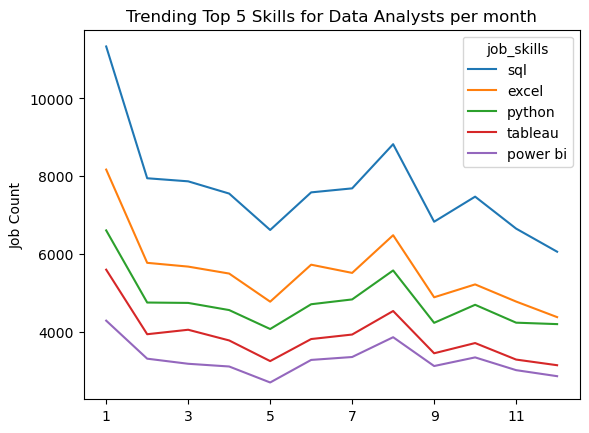

In [80]:
df_da_pivot.iloc[:, :5].plot(kind='line')
plt.title('Trending Top 5 Skills for Data Analysts per month')
plt.ylabel('Job Count')
plt.xlabel('')
plt.show()

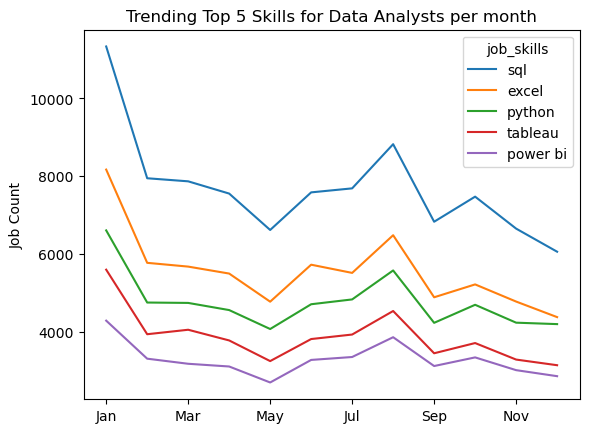

In [ ]:
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b')) # This transforms the number into a month example Jan instead of january after creating a new column called job_posted_month_no
df_da_pivot = df_da_pivot.set_index('job_posted_month')
df_da_pivot = df_da_pivot.drop('job_posted_month_no', axis=1)

df_da_pivot.iloc[:, :5].plot(kind='line')
plt.title('Trending Top 5 Skills for Data Analysts per month')
plt.ylabel('Job Count')
plt.xlabel('')
plt.show()